# Bike Sharing Demand (공유 자전거 수요 예측)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

## Import dataset

In [2]:
df = pd.read_csv('data/Bike_Sharing_Demand_Full.csv')
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
# 데이터프레임 크기
df.shape

(17379, 12)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['DateTime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  count       17379 non-null  int64         
 12  DateTime    17379 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.7 MB


In [6]:
df.set_index('DateTime', inplace = True)

시계열 분석에서 **빈도**는 분석에 주로 사용되는 시간의 단위를 의미한다.

asfreq()를 사용하면,
- 데이터에 존재하지 않았거나 누락된 시간까지 빠짐없이 생성된다.
- 새롭게 생성된 행들의 NaN값을 채우기 위해서는 method 인자를 활용하면 된다.

In [7]:
# 시간단위로 빈도 설정
# ffill: 앞에 있는 데이터의 값을 가져와서 채움
df = df.asfreq('H', method = 'ffill')
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=17544, freq='H')

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from cur

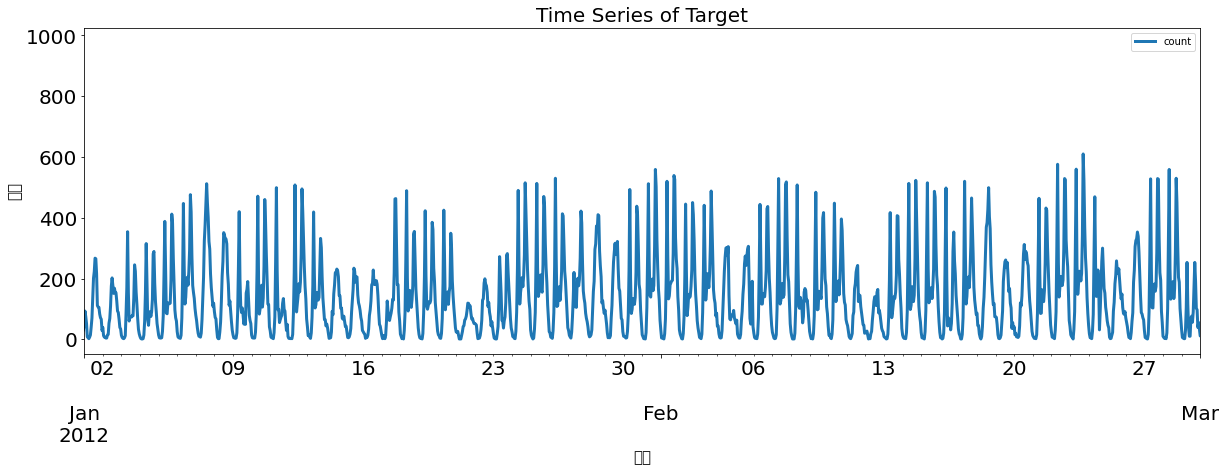

In [8]:
df[['count']].plot(kind='line', 
                   figsize=(20, 6), 
                   linewidth=3, 
                   fontsize = 20, 
                   xlim=('2012-01-01', '2012-03-01'))

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('날짜', fontsize=15)
plt.ylabel('수요', fontsize=15)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from cur

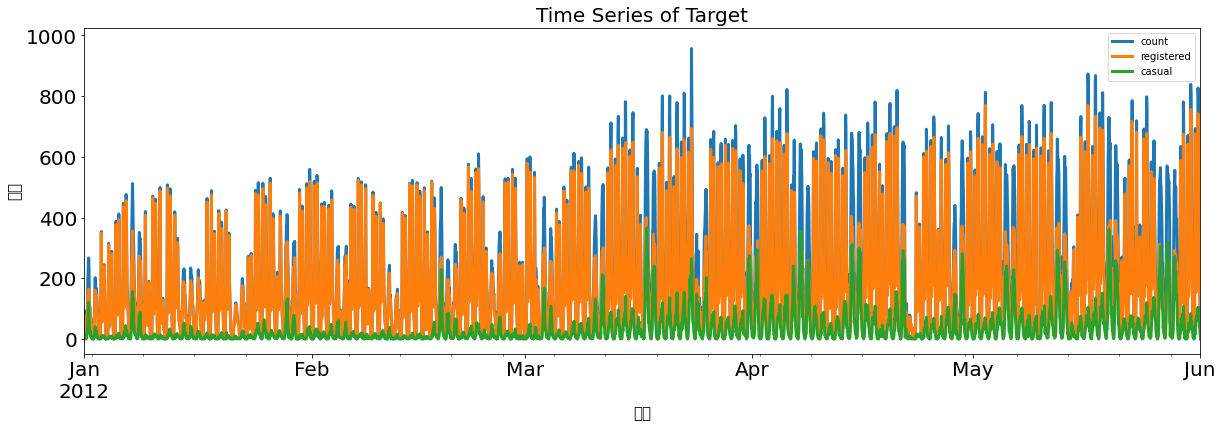

In [9]:
df[['count','registered','casual']].plot(kind='line', 
                                         figsize=(20, 6), 
                                         linewidth=3, 
                                         fontsize = 20, 
                                         xlim=('2012-01-01', '2012-06-01'))

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('날짜', fontsize=15)
plt.ylabel('수요', fontsize=15)
plt.show()

## Model Parameter

* additive: Trend + Seasonal + Residual
* multiplicative: Trend X Seasonal X Residual

### model = additive

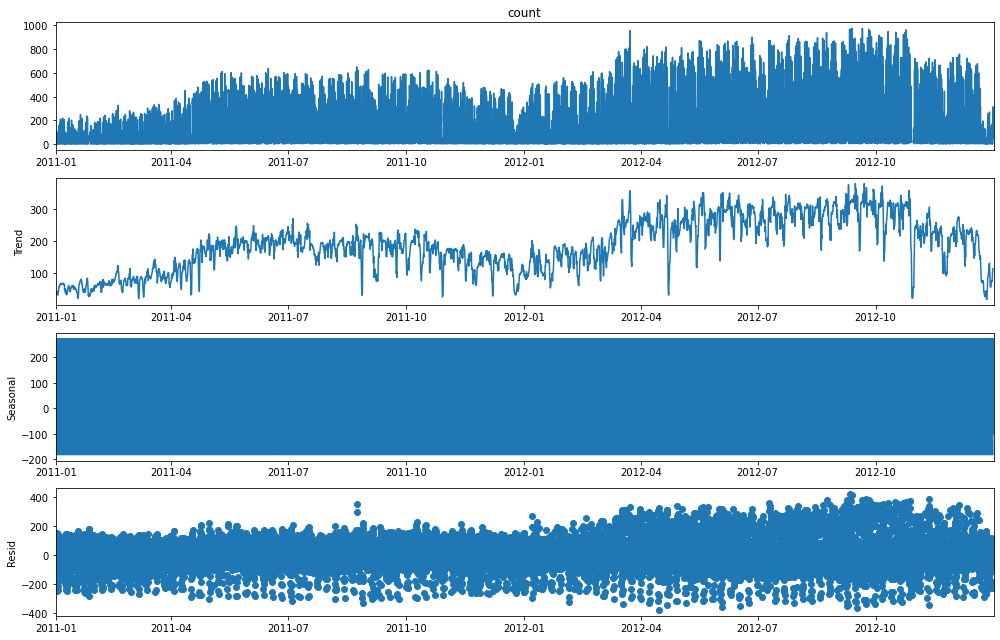

In [10]:
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(df['count'], model='additive').plot()
plt.show()

### model = multiplicative

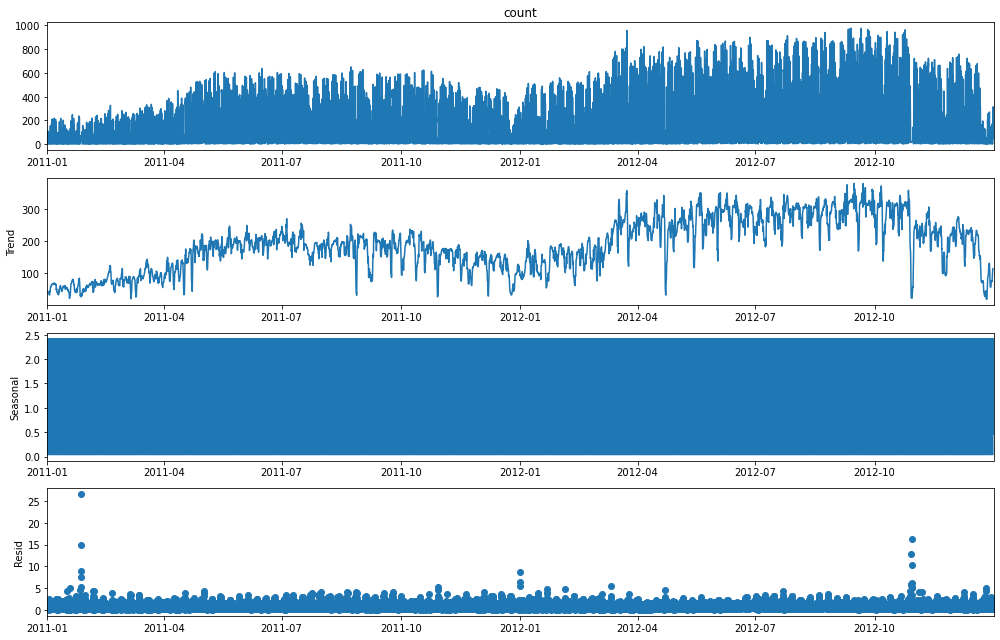

In [11]:
sm.tsa.seasonal_decompose(df['count'], model='multiplicative').plot()
plt.show()

- Trend, Seasonal 그래프를 비교해보면 additive와 multiplicative가 유사한 형태를 보인다.
- Residual 그래프의 경우 additive가 좀 더 적절한 형태를 띄고 있다.

In [12]:
result = sm.tsa.seasonal_decompose(df['count'], model='additive')

In [13]:
# trend 저장
y_trend = pd.DataFrame(result.trend)
y_trend.fillna(method='bfill', inplace=True)
y_trend.fillna(method='ffill', inplace=True)
y_trend.columns = ['count_trend']

# seasonal 저장
y_seasonal = pd.DataFrame(result.seasonal)
y_seasonal.fillna(method='bfill', inplace=True)
y_seasonal.fillna(method='ffill', inplace=True)
y_seasonal.columns = ['count_seasonal']

In [14]:
# trend, seasonal 데이터프레임 병합
df = pd.concat([df, y_trend, y_seasonal], axis = 1)

### 일(Day), 주(Week) 단위 분석

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from cur

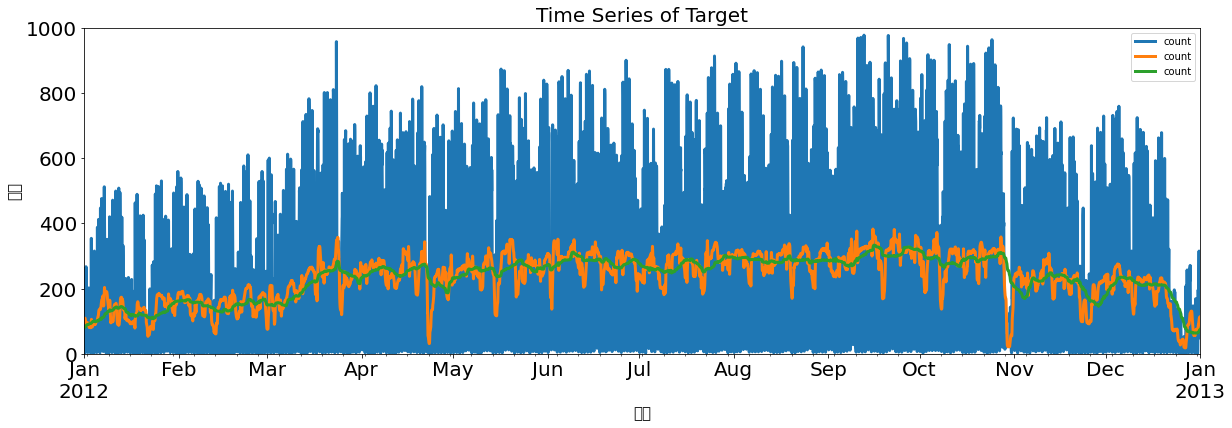

In [15]:
pd.concat([df[['count']],
           df[['count']].rolling(24).mean(),
           df[['count']].rolling(24*7).mean()], axis=1).plot(kind='line',
                                                             figsize=(20, 6),
                                                             linewidth=3,
                                                             fontsize=20,
                                                             xlim=('2012-01-01', '2013-01-01'),
                                                             ylim=(0, 1000))

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('날짜', fontsize=15)
plt.ylabel('수요', fontsize=15)
plt.show()

In [16]:
# rolling 함수는 이동 평균을 계산하는 함수이기 때문에,
# window 크기만큼 이동하여 그 앞의 값들의 연산을 수행한다.
# 현재는 24로 지정되어 있기때문에
# 0~22번째 인덱스까지는 NaN값이 저장되어 있다.
y_count_by_day = df[['count']].rolling(24).mean()
y_count_by_day.fillna(method='ffill', inplace=True)
y_count_by_day.fillna(method='bfill', inplace=True)
y_count_by_day.columns = ['count_by_day']

y_count_by_week = df[['count']].rolling(24*7).mean()
y_count_by_week.fillna(method='ffill', inplace=True)
y_count_by_week.fillna(method='bfill', inplace=True)
y_count_by_week.columns = ['count_by_week']

In [17]:
df = pd.concat([df, y_count_by_day, y_count_by_week], axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_by_day,count_by_week
DateTime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,41.0625,-134.252007,41.041667,56.107143
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,41.0625,-154.752264,41.041667,56.107143
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,41.0625,-165.274467,41.041667,56.107143
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,41.0625,-176.484342,41.041667,56.107143
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,41.0625,-181.666248,41.041667,56.107143


In [18]:
y_diff = df[['count']].diff()
y_diff.fillna(method='bfill', inplace=True)
y_diff.fillna(method='ffill', inplace=True)
y_diff.columns = ['count_diff']

In [19]:
df = pd.concat([df, y_diff], axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_by_day,count_by_week,count_diff
DateTime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,41.0625,-134.252007,41.041667,56.107143,24.0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,41.0625,-154.752264,41.041667,56.107143,24.0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,41.0625,-165.274467,41.041667,56.107143,-8.0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,41.0625,-176.484342,41.041667,56.107143,-19.0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,41.0625,-181.666248,41.041667,56.107143,-12.0


In [20]:
df['temp_group'] = pd.cut(df['temp'], 10)
df['temp_group'].dtype

CategoricalDtype(categories=[(0.78, 4.838], (4.838, 8.856], (8.856, 12.874], (12.874, 16.892], (16.892, 20.91], (20.91, 24.928], (24.928, 28.946], (28.946, 32.964], (32.964, 36.982], (36.982, 41.0]],
              ordered=True)

In [21]:
df['Year'] = df.datetime.dt.year
df['Quarter'] = df.datetime.dt.quarter
df['Quarter_v2'] = df['Quarter'] + (df.Year - df.Year.min()) * 4
df['Month'] = df.datetime.dt.month
df['Day'] = df.datetime.dt.day
df['Hour'] = df.datetime.dt.hour
df['DayofWeek'] = df.datetime.dt.dayofweek
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_by_week,count_diff,temp_group,Year,Quarter,Quarter_v2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,56.107143,24.0,"(8.856, 12.874]",2011,1,1,1,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,56.107143,24.0,"(8.856, 12.874]",2011,1,1,1,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,56.107143,-8.0,"(8.856, 12.874]",2011,1,1,1,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,56.107143,-19.0,"(8.856, 12.874]",2011,1,1,1,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,56.107143,-12.0,"(8.856, 12.874]",2011,1,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,11,...,73.303571,-3.0,"(8.856, 12.874]",2012,4,8,12,31,19,0
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,8,...,73.696429,-30.0,"(8.856, 12.874]",2012,4,8,12,31,20,0
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,7,...,74.101190,1.0,"(8.856, 12.874]",2012,4,8,12,31,21,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        17544 non-null  datetime64[ns]
 1   season          17544 non-null  int64         
 2   holiday         17544 non-null  int64         
 3   workingday      17544 non-null  int64         
 4   weather         17544 non-null  int64         
 5   temp            17544 non-null  float64       
 6   atemp           17544 non-null  float64       
 7   humidity        17544 non-null  int64         
 8   windspeed       17544 non-null  float64       
 9   casual          17544 non-null  int64         
 10  registered      17544 non-null  int64         
 11  count           17544 non-null  int64         
 12  count_trend     17544 non-null  float64       
 13  count_seasonal  17544 non-null  float64       
 14  count_by_da

미래 종속 변수에 영향을 주는 경우

In [23]:
df['count_lag1'] = df['count'].shift(1)
df['count_lag2'] = df['count'].shift(2)

In [24]:
df['count_lag1'].fillna(method='bfill', inplace=True)
df['count_lag2'].fillna(method='bfill', inplace=True)

In [25]:
df = pd.concat([df, pd.get_dummies(df['Quarter'], prefix='Quarter_dummy', drop_first=True)], axis=1)

In [26]:
del df['Quarter']

In [27]:
# dataframe -> csv file
#df.to_csv('data/preprocessed_bike_sharing.csv')

In [28]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_v2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_dummy_2,Quarter_dummy_3,Quarter_dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,1,1,1,0,5,16.0,16.0,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,1,1,1,5,16.0,16.0,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,1,1,1,2,5,40.0,16.0,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,1,1,1,3,5,32.0,40.0,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,1,1,4,5,13.0,32.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,11,...,8,12,31,19,0,122.0,164.0,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,8,...,8,12,31,20,0,119.0,122.0,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,7,...,8,12,31,21,0,89.0,119.0,0,0,1


## Visualization

In [29]:
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17544,NaN,NaN,NaN,NaT,NaT,2.49658,1.11008,1,2,3,3,4
holiday,17544,NaN,NaN,NaN,NaT,NaT,0.0297538,0.169912,0,0,0,0,1
workingday,17544,NaN,NaN,NaN,NaT,NaT,0.682969,0.465333,0,0,1,1,1
weather,17544,NaN,NaN,NaN,NaT,NaT,1.43422,0.648339,1,1,1,2,4
temp,17544,NaN,NaN,NaN,NaT,NaT,20.3034,7.91779,0.82,13.94,20.5,27.06,41
atemp,17544,NaN,NaN,NaN,NaT,NaT,23.7055,8.62351,0,16.665,24.24,31.06,50
humidity,17544,NaN,NaN,NaN,NaT,NaT,62.8723,19.3379,0,48,63,79,100
windspeed,17544,NaN,NaN,NaN,NaT,NaT,12.8136,8.29316,0,7.0015,12.998,16.9979,56.9969
casual,17544,NaN,NaN,NaN,NaT,NaT,35.3501,49.1868,0,4,16,48,367


C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a 

(0.0, 1000.0)

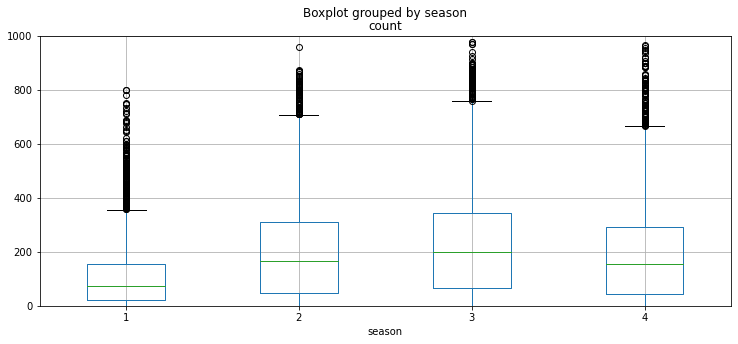

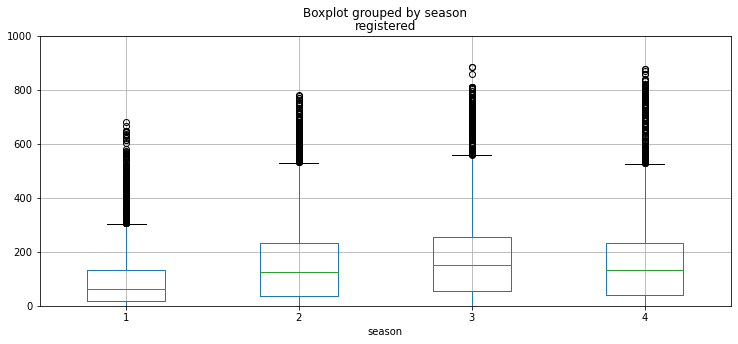

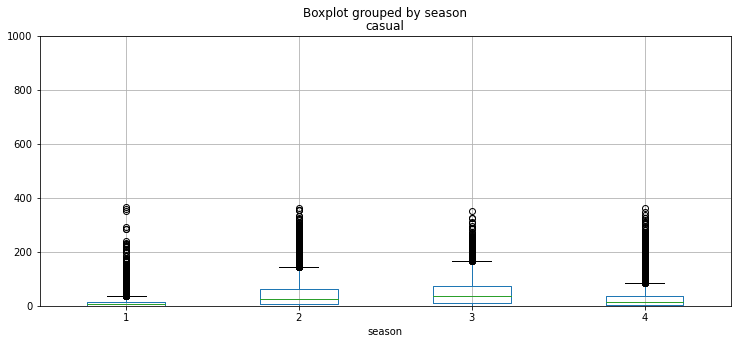

In [30]:
df.boxplot(column='count', by='season', grid=True, figsize=(12,5))
plt.ylim(0, 1000)

df.boxplot(column='registered', by='season', grid=True, figsize=(12,5))
plt.ylim(0, 1000)

df.boxplot(column='casual', by='season', grid=True, figsize=(12,5))
plt.ylim(0, 1000)

### Demand by holiday and workingday

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(0.0, 1000.0)

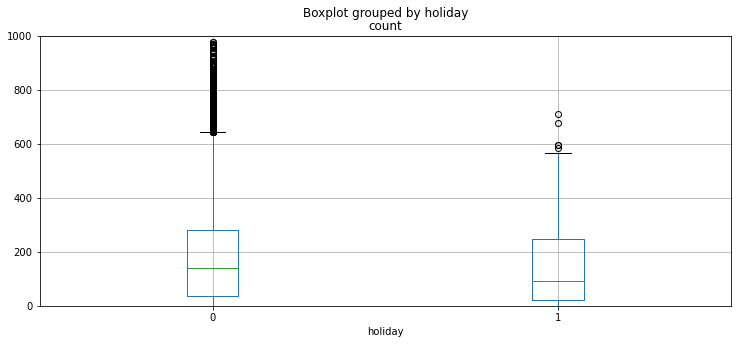

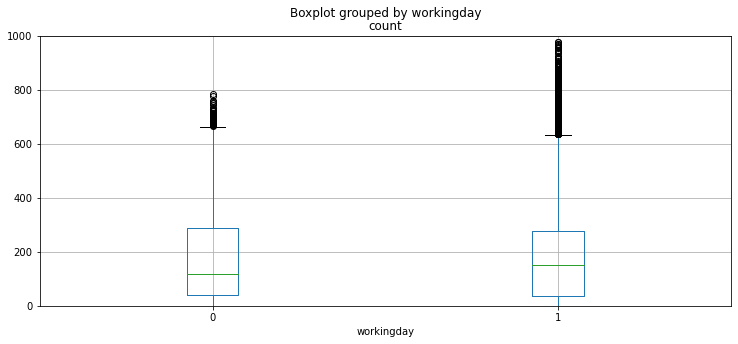

In [31]:
df.boxplot(column='count', by='holiday', grid=True, figsize=(12,5))
plt.ylim(0, 1000)

df.boxplot(column='count', by='workingday', grid=True, figsize=(12,5))
plt.ylim(0, 1000)

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


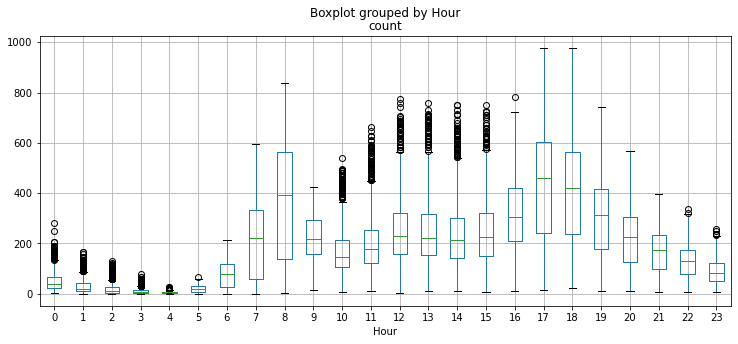

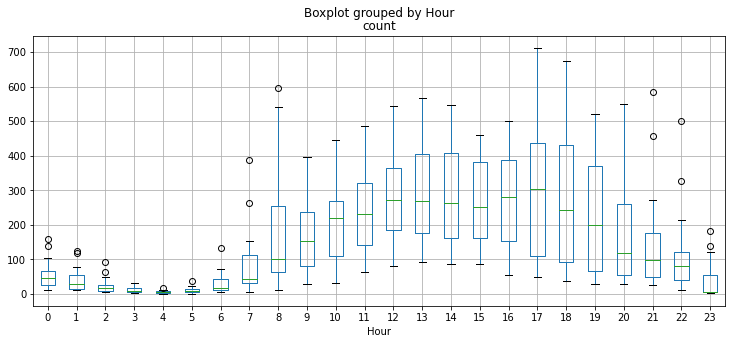

In [32]:
df[df.holiday == 0].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
df[df.holiday == 1].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
plt.show()

### Correlation

In [33]:
df.corr().style.background_gradient().set_precision(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_by_day,count_by_week,count_diff,Year,Quarter_v2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_dummy_2,Quarter_dummy_3,Quarter_dummy_4
season,1.00,-0.02,0.02,-0.02,0.32,0.33,0.15,-0.14,0.12,0.18,0.18,0.41,0.00,0.41,0.47,-0.00,-0.00,0.42,0.83,-0.00,-0.01,-0.01,0.18,0.18,-0.20,0.31,0.60
holiday,-0.02,1.00,-0.26,-0.00,-0.04,-0.04,-0.01,0.01,0.03,-0.05,-0.04,-0.08,-0.00,-0.07,-0.04,-0.00,0.00,0.01,0.01,-0.01,0.01,-0.19,-0.04,-0.04,-0.03,-0.03,0.05
workingday,0.02,-0.26,1.00,0.04,0.05,0.05,0.02,-0.02,-0.30,0.13,0.03,0.04,0.00,0.02,0.02,0.01,0.00,-0.00,-0.00,0.01,-0.00,-0.70,0.03,0.02,0.01,0.01,-0.02
weather,-0.02,-0.00,0.04,1.00,-0.11,-0.11,0.43,0.05,-0.16,-0.13,-0.15,-0.25,-0.00,-0.17,-0.07,-0.02,-0.02,-0.02,0.00,0.01,-0.02,-0.06,-0.14,-0.14,-0.03,-0.07,0.05
temp,0.32,-0.04,0.05,-0.11,1.00,0.99,-0.07,-0.02,0.46,0.34,0.41,0.60,0.17,0.61,0.62,-0.00,0.05,0.14,0.21,0.02,0.14,-0.03,0.41,0.40,0.26,0.60,-0.31
atemp,0.33,-0.04,0.05,-0.11,0.99,1.00,-0.06,-0.06,0.46,0.34,0.41,0.61,0.16,0.61,0.62,-0.01,0.05,0.15,0.22,0.02,0.13,-0.03,0.41,0.40,0.27,0.58,-0.29
humidity,0.15,-0.01,0.02,0.43,-0.07,-0.06,1.00,-0.27,-0.35,-0.28,-0.33,-0.09,-0.34,-0.06,0.04,0.00,-0.08,0.00,0.16,0.03,-0.27,-0.04,-0.33,-0.31,-0.03,0.06,0.10
windspeed,-0.14,0.01,-0.02,0.05,-0.02,-0.06,-0.27,1.00,0.08,0.07,0.08,-0.16,0.19,-0.14,-0.10,0.01,-0.01,-0.07,-0.13,0.02,0.14,-0.00,0.08,0.06,0.04,-0.10,-0.06
casual,0.12,0.03,-0.30,-0.16,0.46,0.46,-0.35,0.08,1.00,0.51,0.70,0.39,0.44,0.39,0.34,0.08,0.14,0.16,0.07,-0.01,0.30,0.24,0.65,0.58,0.15,0.17,-0.10
registered,0.18,-0.05,0.13,-0.13,0.34,0.34,-0.28,0.07,0.51,1.00,0.97,0.40,0.71,0.38,0.36,0.31,0.26,0.28,0.13,-0.01,0.37,-0.08,0.80,0.53,0.06,0.13,-0.00
